## DIG for time series data

In [1]:
import numpy as np
from DIG import DIG
import matplotlib.pyplot as plt
import scipy as sci
from scipy import io
import phate

C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\anndata\core\anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
# Load EEG data 
data = io.loadmat('n10_8-12hz.mat')
labels_d = io.loadmat('labelsn10.mat')
labels = labels_d['hyp']
eeg = np.transpose(data['data'])
labels  = np.reshape(labels, 860)

In [3]:
# select some channels 
Data_eeg = eeg[:,5:10]

In [4]:
# Compute histograms distances using DIG
dig = DIG(L1=3840, L3=3840)
hist = dig.compute_hist_distances(Data_eeg)

C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


In [5]:
# Compute PHATE using the histograms distances 
phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
phate_fit = phate_emb.fit_transform(hist.histogram_distances)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 48
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.77 seconds.
Calculated PHATE in 5.13 seconds.


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\select.py:381: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\utils.py:199: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\utils.py:201: FutureWarning: The SparseSeries class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(x, pd.SparseSeries):


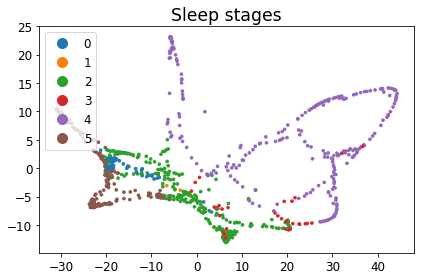

In [6]:
phate.plot.scatter2d(phate_fit, c = labels, title = "Sleep stages", legend_loc = "upper left")


# Influence of the number of bins in the histograms and the covariance time window





In [7]:
Number_bins = np.array([10, 20, 50])
L2_window = np.array([5, 20, 50])

In [8]:
embeddings = []
for i in Number_bins:
    for j in L2_window:
        dig = DIG(L1=3840, L3=3840, n_bins = i, L2 = j)
        hist = dig.compute_hist_distances(Data_eeg)
        phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
        phate_fit = phate_emb.fit_transform(hist.histogram_distances)
        title = "n_bins = " + str(i) + " L2 = " + str(j)
        embedding = [phate_fit, title]
        embeddings.append(embedding)

C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.12 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 30
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.11 seconds.
Calculated PHATE in 12.51 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 49
  Calculated optimal t in 0.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.53 seconds.
Calculated PHATE in 3.90 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 13
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.41 seconds.
Calculated PHATE in 1.73 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 45
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.54 seconds.
Calculated PHATE in 7.92 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 0.15 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 55
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.71 seconds.
Calculated PHATE in 6.16 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 19
  Calculated optimal t in 0.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.39 seconds.
Calculated PHATE in 8.72 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 40
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.19 seconds.
Calculated PHATE in 8.59 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 53
  Calculated optimal t in 0.17 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.21 seconds.
Calculated PHATE in 5.64 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:895: RuntimeWarning: invalid value encountered in true_divide


    Automatically selected t = 17
  Calculated optimal t in 0.12 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.98 seconds.
Calculated PHATE in 2.30 seconds.


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\select.py:381: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\utils.py:199: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\scprep\utils.py:201: FutureWarning: The SparseSeries class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(x, pd.SparseSeries):


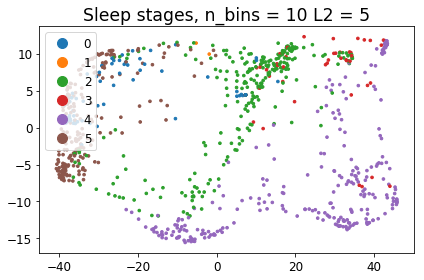

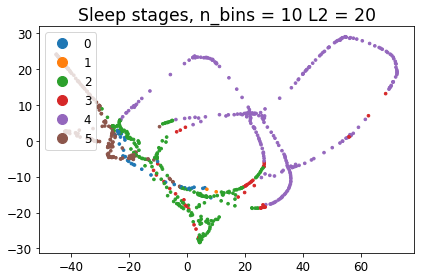

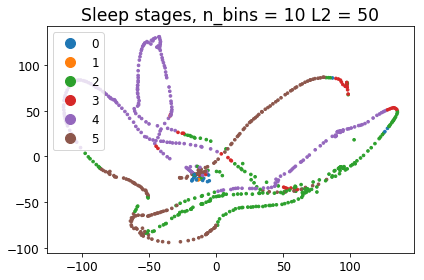

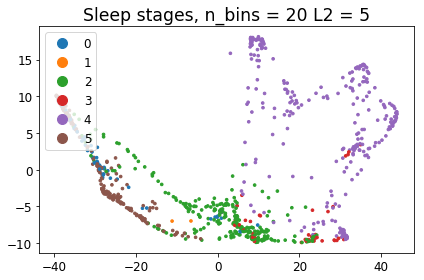

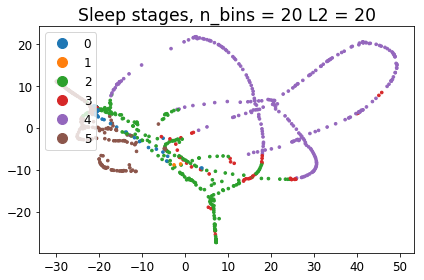

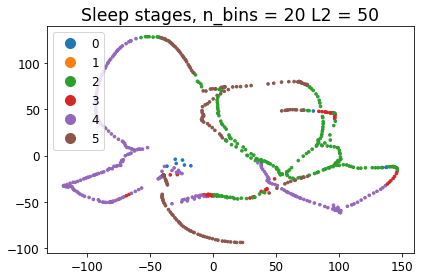

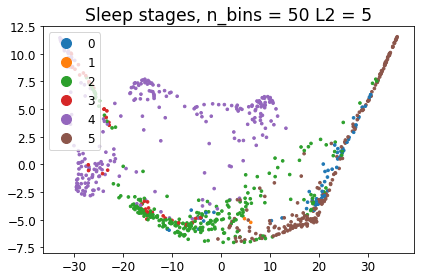

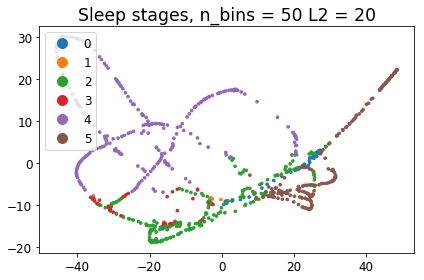

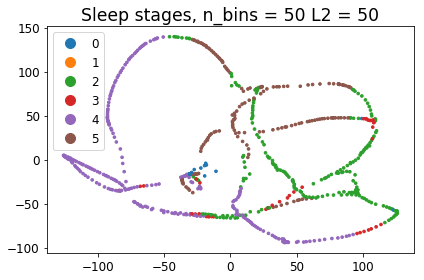

In [9]:

for i in range(len(embeddings)):
    title = embeddings[i][1]
    phate.plot.scatter2d(embeddings[i][0], c = labels, title = "Sleep stages, " + title, legend_loc = "upper left")

# Euclidean distances 

In [10]:
Number_bins = np.array([10, 20, 30, 40, 50])
embeddings = []
for i in Number_bins:
    dig = DIG(L1=3840, L3=3840, n_bins = i, histograms_distance = 'euclidean')
    hist = dig.compute_hist_distances(Data_eeg)
    phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
    phate_fit = phate_emb.fit_transform(hist.histogram_distances)
    title = "n_bins = " + str(i) 
    embedding = [phate_fit, title]
    embeddings.append(embedding)

C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 24
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 11.82 seconds.
Calculated PHATE in 12.20 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 22
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.03 seconds.
Calculated PHATE in 4.38 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 24
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.57 seconds.
Calculated PHATE in 5.91 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 19
  Calculated optimal t in 0.17 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.64 seconds.
Calculated PHATE in 3.04 seconds.


C:\Users\Andres Duque\Documents\Research2\single_cell_eig\python\DIG.py:45: UserWarning: You are not using a DPT matrix
  warnings.warn("You are not using a DPT matrix")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 860 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.12 seconds.
  Calculating optimal t...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 25
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.08 seconds.
Calculated PHATE in 6.48 seconds.


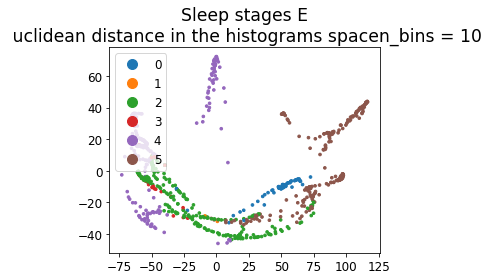

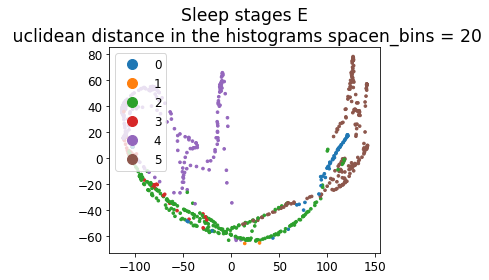

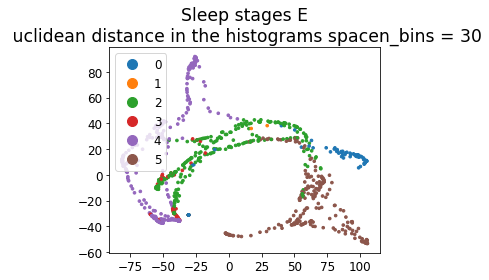

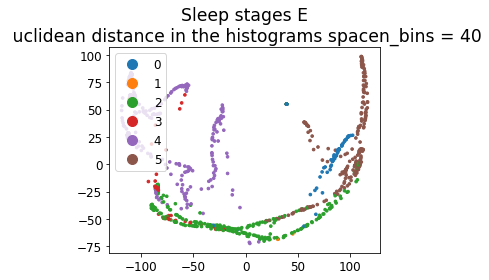

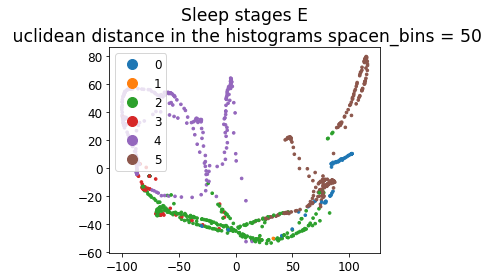

In [12]:
for i in range(len(embeddings)):
    title = embeddings[i][1]
    phate.plot.scatter2d(embeddings[i][0], c = labels, title = "Sleep stages E\n uclidean distance in the histograms space" + title, legend_loc = "upper left")